In [5]:
%pip install xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Load the dataset

In [6]:
df1 = pd.read_csv('modis_2021_India.csv')
df2 = pd.read_csv('modis_2022_India.csv')
df3 = pd.read_csv('modis_2023_India.csv')

In [7]:
df1.head() # print first 5 rows - df1.tail()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


In [8]:
df2.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,30.1138,80.0756,300.0,1.2,1.1,2022-01-01,511,Terra,MODIS,7,6.03,288.4,7.1,D,0
1,23.7726,86.2078,306.1,1.6,1.2,2022-01-01,512,Terra,MODIS,62,6.03,293.5,10.4,D,2
2,22.2080,84.8627,304.8,1.4,1.2,2022-01-01,512,Terra,MODIS,42,6.03,293.3,5.8,D,2
3,23.7621,86.3946,306.9,1.6,1.2,2022-01-01,512,Terra,MODIS,38,6.03,295.2,9.3,D,2
4,23.6787,86.0891,303.6,1.5,1.2,2022-01-01,512,Terra,MODIS,52,6.03,293.1,7.2,D,2


In [9]:
df3.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,9.3280,77.6247,318.0,1.1,1.0,2023-01-01,821,Aqua,MODIS,62,61.03,305.0,7.6,D,0
1,10.4797,77.9378,313.8,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,299.4,4.3,D,0
2,13.2478,77.2639,314.7,1.0,1.0,2023-01-01,822,Aqua,MODIS,55,61.03,302.4,4.9,D,0
3,12.2994,78.4085,314.3,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,301.9,4.8,D,0
4,14.1723,75.5024,338.4,1.2,1.1,2023-01-01,823,Aqua,MODIS,88,61.03,305.3,41.5,D,0


In [10]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


In [11]:
df.shape # rows and cols

(271217, 15)

In [12]:
df.info() # dt, memc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271217 entries, 0 to 271216
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    271217 non-null  float64
 1   longitude   271217 non-null  float64
 2   brightness  271217 non-null  float64
 3   scan        271217 non-null  float64
 4   track       271217 non-null  float64
 5   acq_date    271217 non-null  object 
 6   acq_time    271217 non-null  int64  
 7   satellite   271217 non-null  object 
 8   instrument  271217 non-null  object 
 9   confidence  271217 non-null  int64  
 10  version     271217 non-null  float64
 11  bright_t31  271217 non-null  float64
 12  frp         271217 non-null  float64
 13  daynight    271217 non-null  object 
 14  type        271217 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 31.0+ MB


In [13]:
# Any missing values?
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
# List out column names to check
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [16]:
df.describe().T # statistics of dataset - numbers!

,count,mean,std,min,25%,50%,75%,max
latitude,271217.0,23.947505,4.919846,8.1362,20.9655,23.7888,27.7827,34.9734
longitude,271217.0,81.284024,6.559071,68.4526,75.8802,79.3209,84.7559,97.1044
brightness,271217.0,323.719192,14.147221,300.0000,314.5000,322.0000,330.7000,505.7000
scan,271217.0,1.421732,0.630742,1.0000,1.0000,1.2000,1.5000,4.8000
track,271217.0,1.152716,0.201943,1.0000,1.0000,1.1000,1.2000,2.0000
acq_time,271217.0,824.623755,353.966965,321.0000,648.0000,756.0000,825.0000,2202.0000
confidence,271217.0,64.065081,18.165329,0.0000,54.0000,66.0000,76.0000,100.0000
version,271217.0,21.933778,24.935515,6.0300,6.0300,6.0300,61.0300,61.0300
bright_t31,271217.0,303.499177,8.282440,267.2000,298.2000,302.5000,309.2000,400.1000
frp,271217.0,27.722058,81.017471,0.0000,8.7000,13.5000,24.5000,6961.8000


In [17]:
# Check Unique values of target variable
df.type.value_counts()

type
0    257625
2     13550
3        42
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

In [18]:
# Check unique and n unique for all categorical features
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("-" * 50)

Column: acq_date
Unique values: ['2021-01-01' '2021-01-02' '2021-01-03' ... '2023-12-29' '2023-12-30'
 '2023-12-31']
Number of unique values: 1088
--------------------------------------------------
Column: satellite
Unique values: ['Terra' 'Aqua']
Number of unique values: 2
--------------------------------------------------
Column: instrument
Unique values: ['MODIS']
Number of unique values: 1
--------------------------------------------------
Column: daynight
Unique values: ['D' 'N']
Number of unique values: 2
--------------------------------------------------


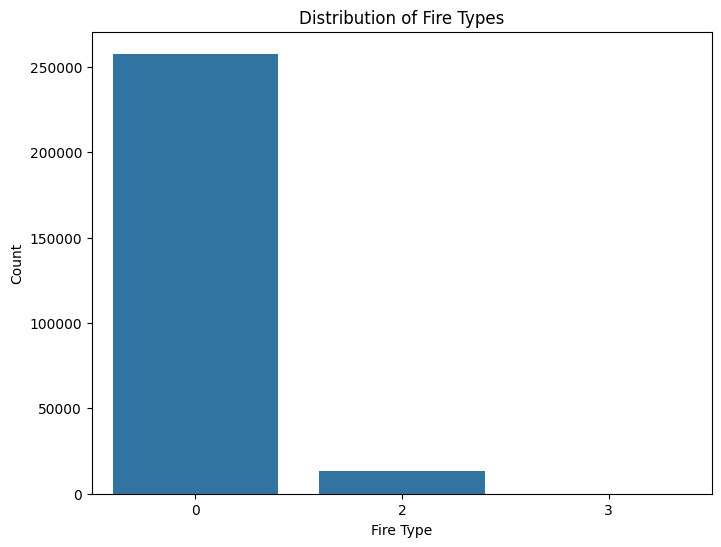

In [19]:
# Count plot for 'type'
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Fire Types')
plt.xlabel('Fire Type')
plt.ylabel('Count')
plt.show()


- The count plot shows the distribution of different fire types in the dataset.
- It is evident that 'MODIS' is the most frequent fire type, followed by 'VIIRS'.
- The 'type' variable appears to be unbalanced, with 'MODIS' having significantly more observations than 'VIIRS'. This imbalance might need to be considered during model training.

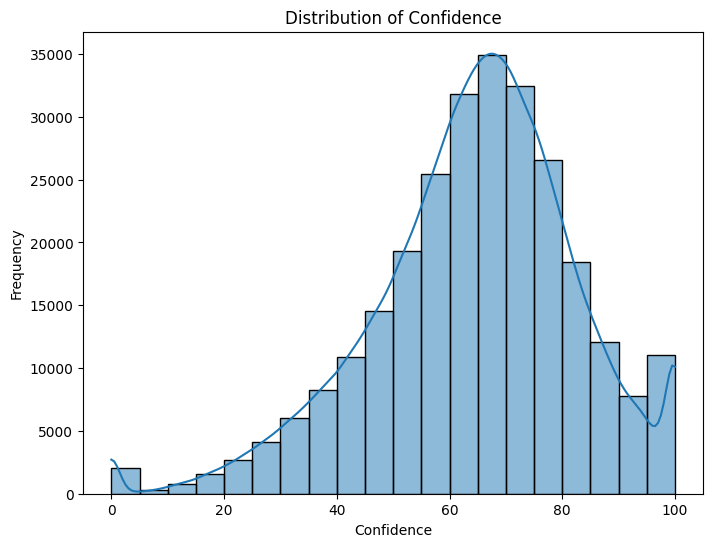

In [20]:
# Histogram of 'confidence'
plt.figure(figsize=(8, 6))
sns.histplot(df['confidence'], bins=20, kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

- The histogram illustrates the distribution of the 'confidence' feature.
- The distribution appears to be bimodal, with peaks around low confidence values and high confidence values.
- There are fewer observations in the middle range of confidence.
- This suggests that observations are often recorded with either low confidence or high confidence.

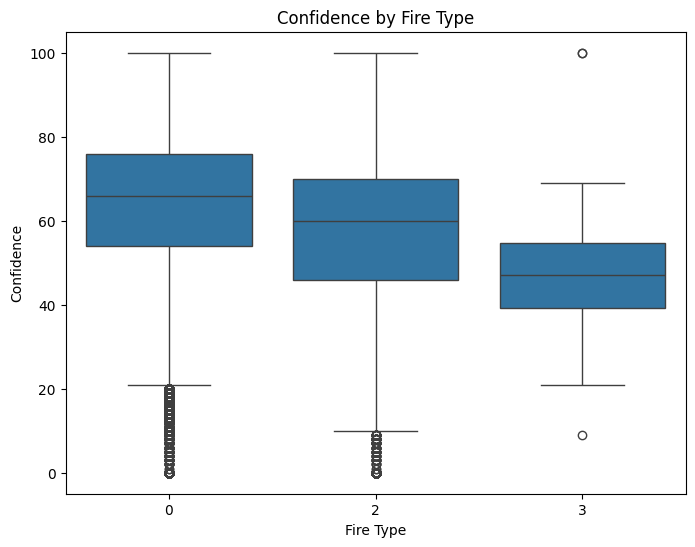

In [21]:
# Box plot for 'confidence' by 'type'
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='confidence', data=df)
plt.title('Confidence by Fire Type')
plt.xlabel('Fire Type')
plt.ylabel('Confidence')
plt.show()

- The box plot shows the distribution of 'confidence' for each fire type
- Both 0 and 2 have a wide range of confidence values.
- The median confidence for both types appears to be in the higher range.
- There are some outliers, particularly for the 'MODIS' type, indicating observations with unusually low or high confidence.

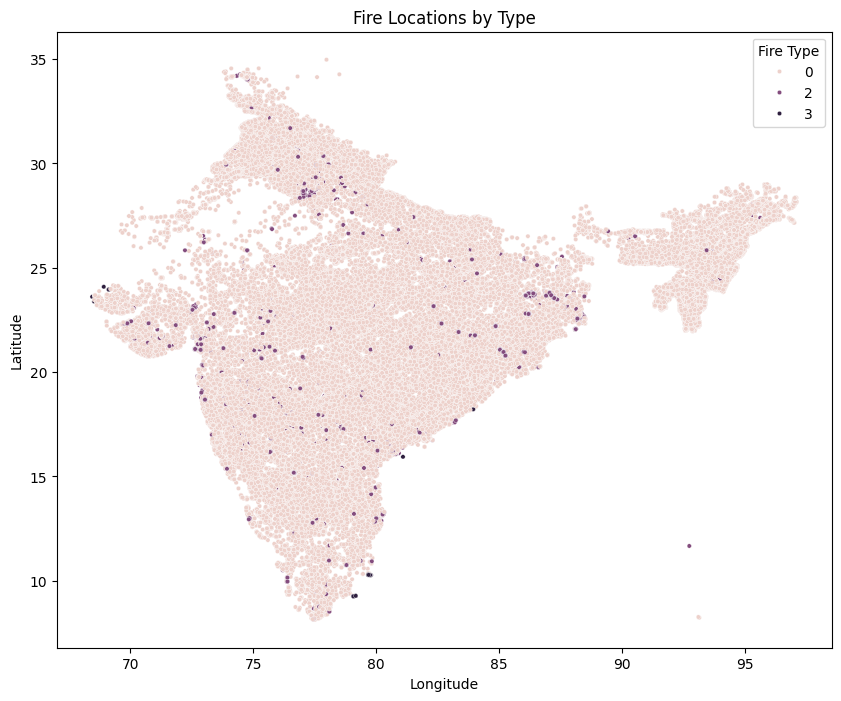

In [22]:
# Scatter plot of 'latitude' vs 'longitude'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='type', s=10)
plt.title('Fire Locations by Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fire Type')
plt.show()

 - The scatter plot visualizes the geographical distribution of fire locations, colored by fire type.
- It provides a visual representation of where fires are occurring based on latitude and longitude.
- Different fire types might be concentrated in specific geographical areas, which could be a useful feature for modeling.
- The density of points indicates areas with higher fire activity.

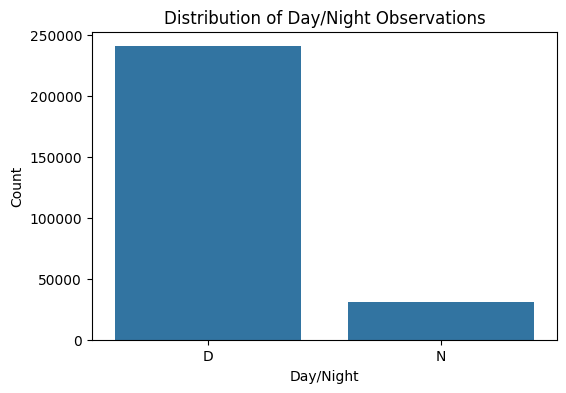

In [23]:
# Count plot for 'daynight'
plt.figure(figsize=(6, 4))
sns.countplot(x='daynight', data=df)
plt.title('Distribution of Day/Night Observations')
plt.xlabel('Day/Night')
plt.ylabel('Count')
plt.show()

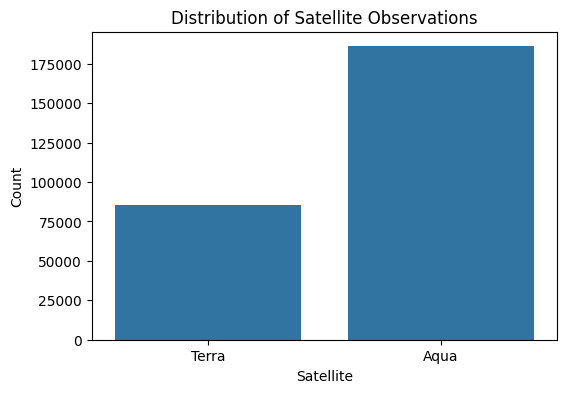

In [24]:
# Count plot for 'Satellite'
plt.figure(figsize=(6, 4))
sns.countplot(x='satellite', data=df)
plt.title('Distribution of Satellite Observations')
plt.xlabel('Satellite')
plt.ylabel('Count')
plt.show()

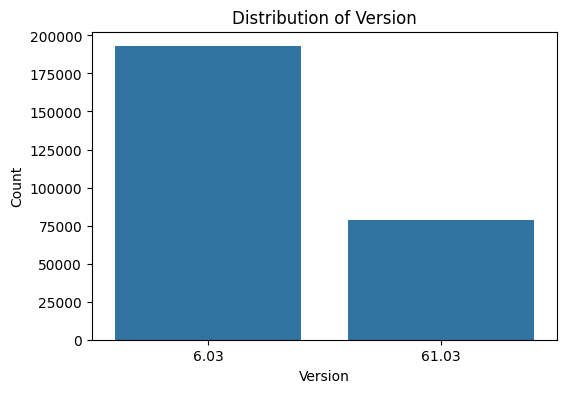

In [25]:
# Count plot for 'version'
plt.figure(figsize=(6, 4))
sns.countplot(x='version', data=df)
plt.title('Distribution of Version')
plt.xlabel('Version')
plt.ylabel('Count')
plt.show()

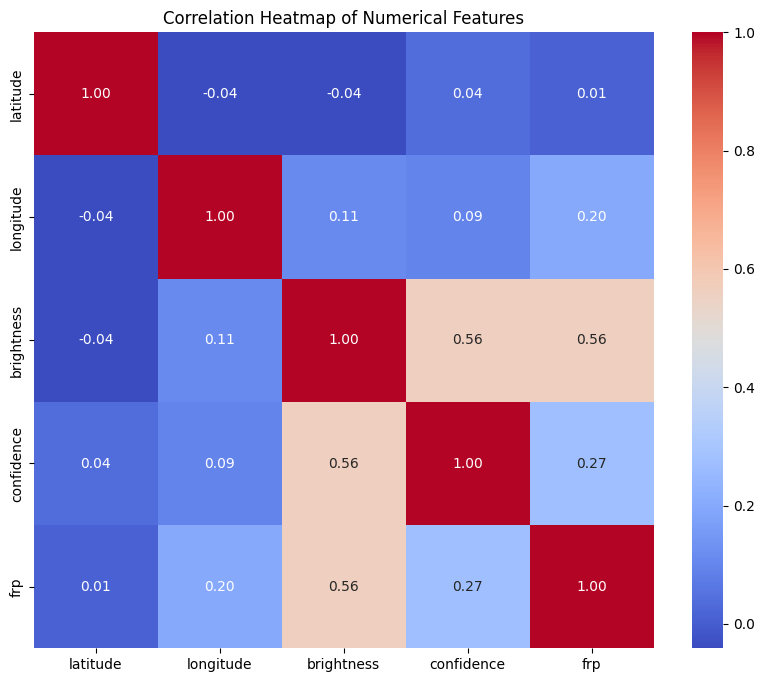

In [26]:
# Heatmap of correlations between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df[['latitude', 'longitude', 'brightness', 'confidence', 'frp']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [27]:
numerical_cols = df.select_dtypes(include=np.number).columns

In [28]:
numerical_cols

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time',
       'confidence', 'version', 'bright_t31', 'frp', 'type'],
      dtype='object')

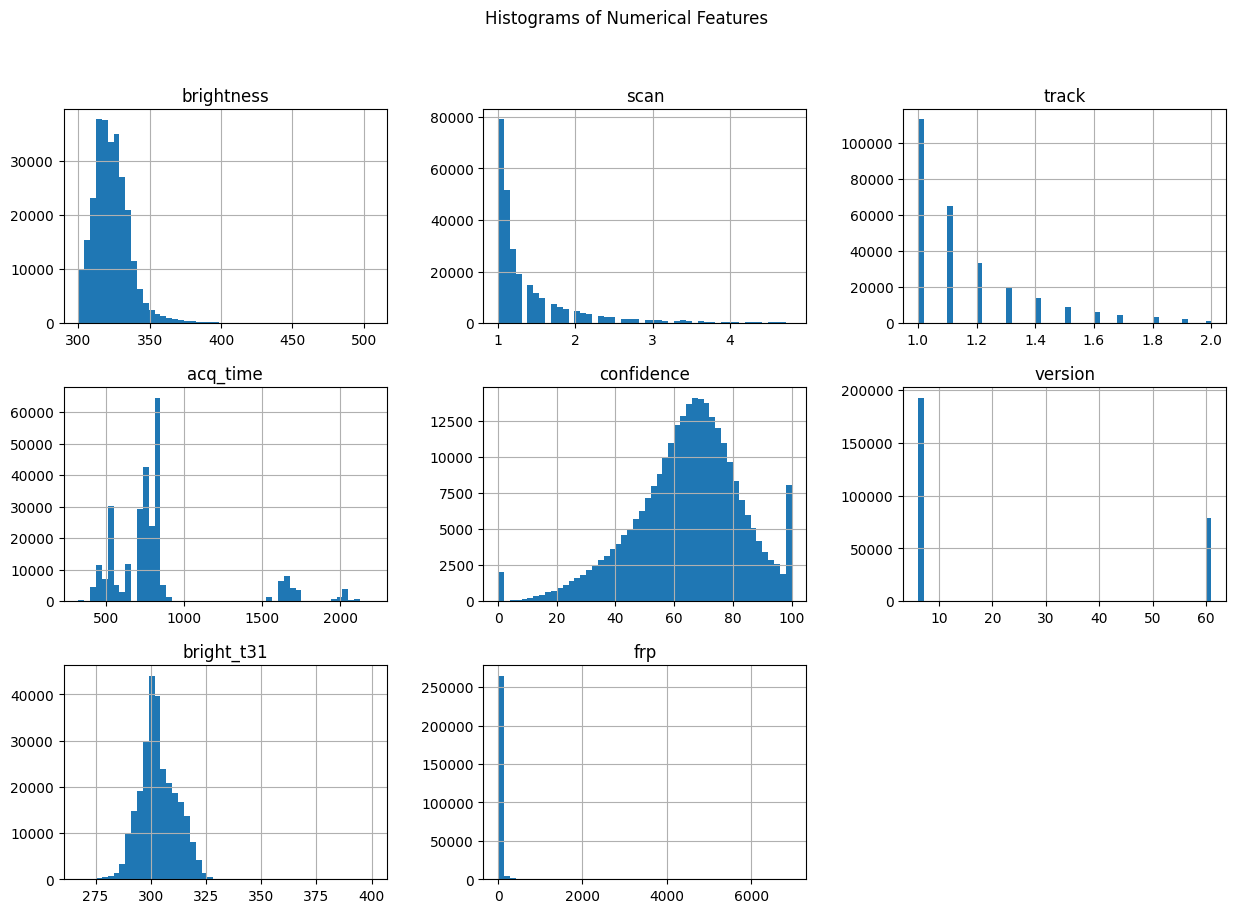

In [29]:
numerical_cols = ['brightness', 'scan', 'track', 'acq_time','confidence', 'version', 'bright_t31', 'frp']
df[numerical_cols].hist(bins=50, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [30]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')
Analyzing distribution for: brightness


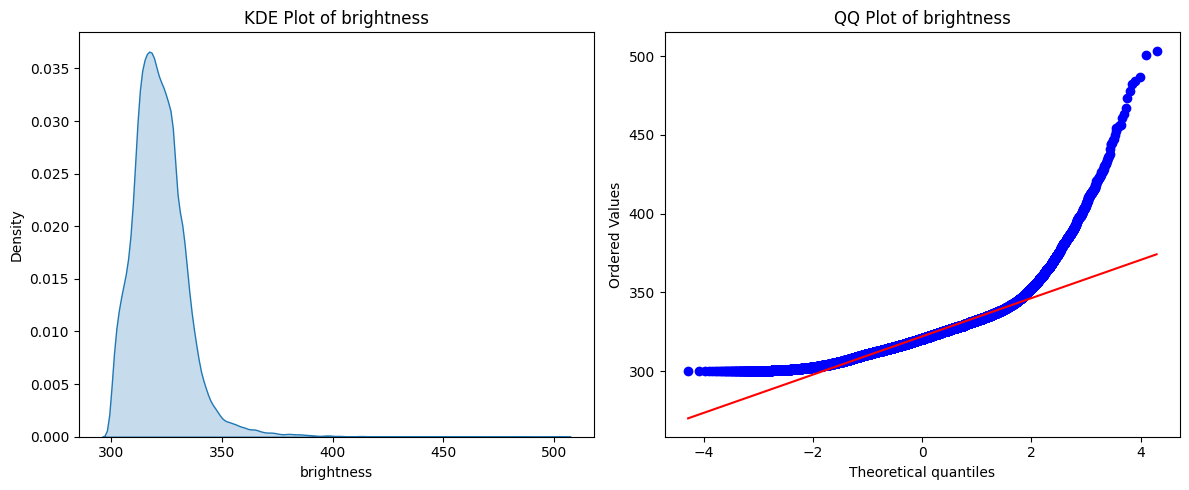

--------------------------------------------------
Analyzing distribution for: confidence


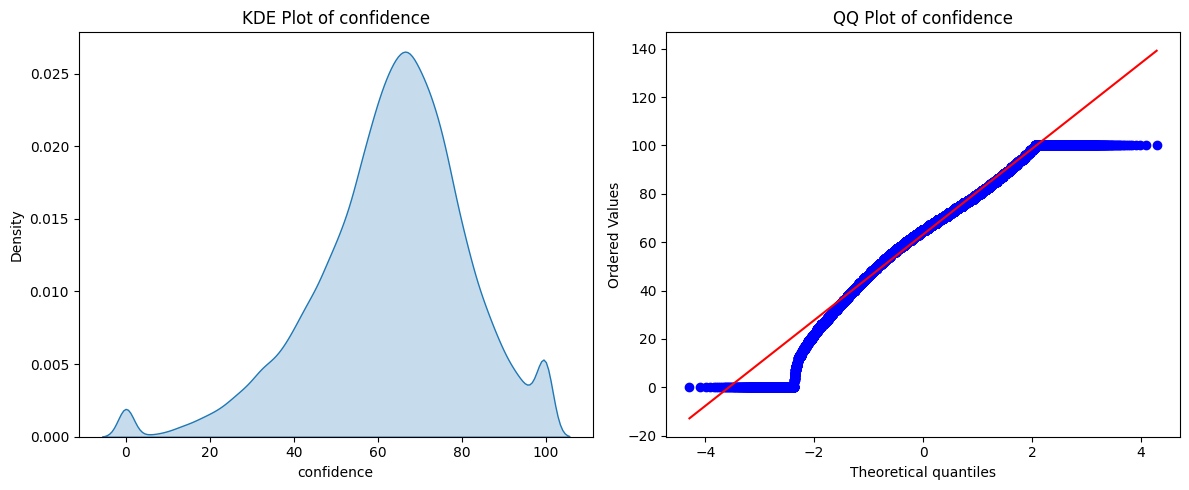

--------------------------------------------------
Analyzing distribution for: frp


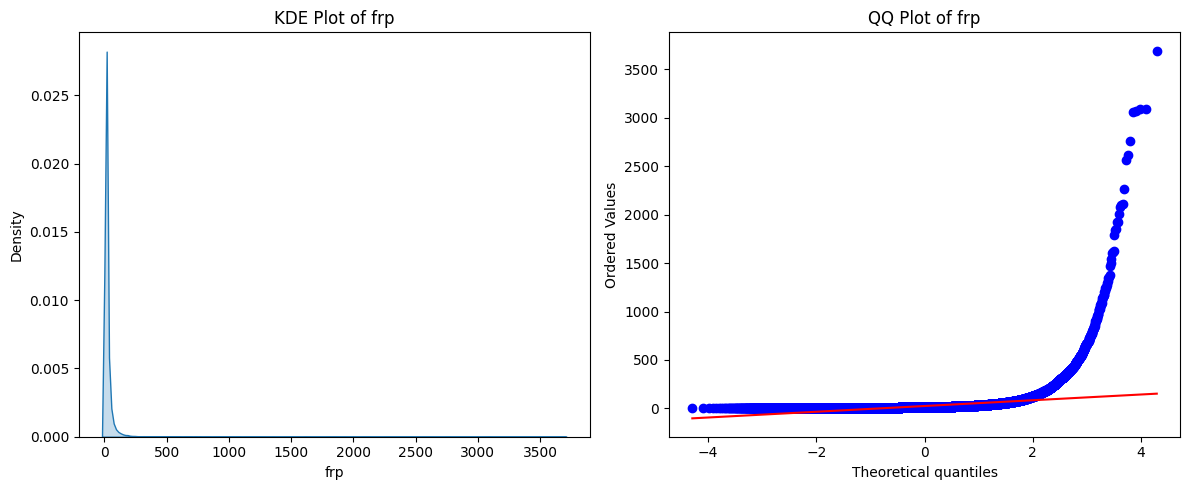

--------------------------------------------------
Analyzing distribution for: bright_t31


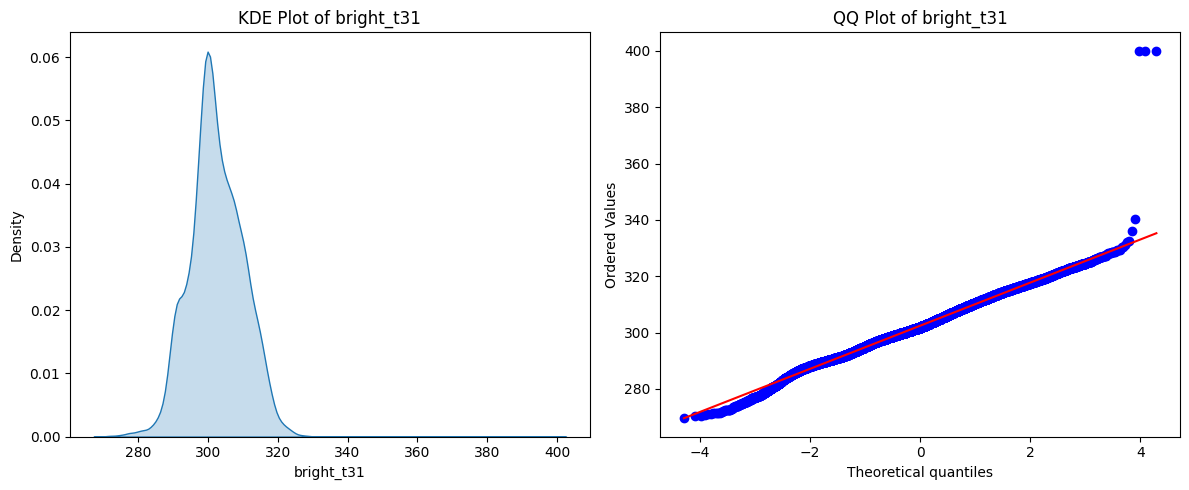

--------------------------------------------------
Analyzing distribution for: scan


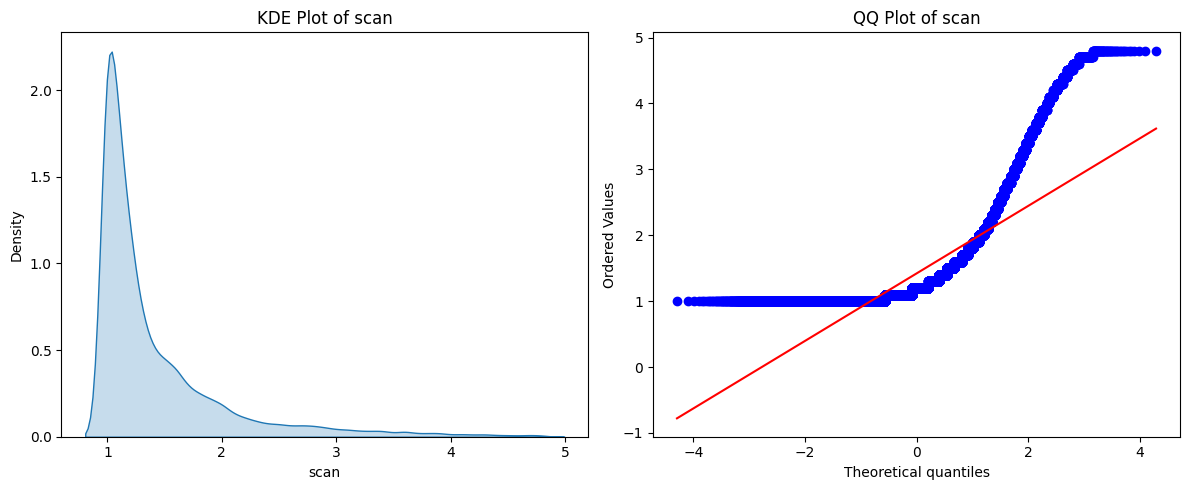

--------------------------------------------------
Analyzing distribution for: track


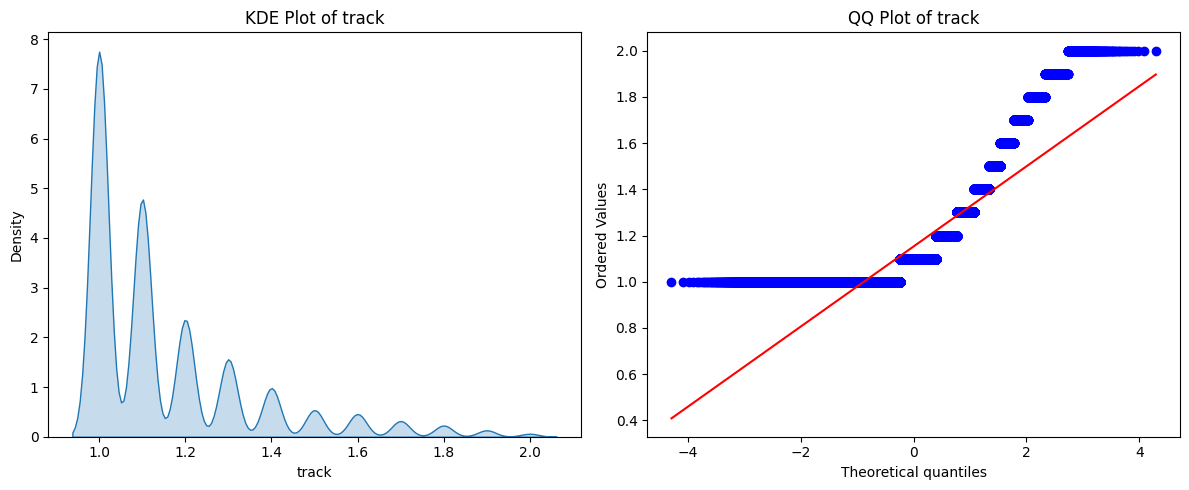

--------------------------------------------------


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

# Load your data
df = pd.read_csv(r"C:\Users\91920\OneDrive\Desktop\aicte internship\modis_2021_India.csv")
df = pd.read_csv(r"C:\Users\91920\OneDrive\Desktop\aicte internship\modis_2022_India.csv")
df = pd.read_csv(r"C:\Users\91920\OneDrive\Desktop\aicte internship\modis_2023_India.csv")
print(df.columns)

numerical_features = ['brightness', 'confidence', 'frp', 'bright_t31', 'scan', 'track']

for feature in numerical_features:
    if feature in df.columns:
        print(f"Analyzing distribution for: {feature}")

        data = df[feature].dropna()

        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.kdeplot(data, fill=True)
        plt.title(f'KDE Plot of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Density')

        plt.subplot(1, 2, 2)
        stats.probplot(data, dist="norm", plot=plt)
        plt.title(f'QQ Plot of {feature}')

        plt.tight_layout()
        plt.show()
        print("-" * 50)
    else:
        print(f"❌ Column '{feature}' not found in DataFrame.")



In [32]:
# --- Temporal Analysis ---
# Convert 'acq_date' to datetime objects
df['acq_date'] = pd.to_datetime(df['acq_date'])
# Extract temporal features
df['year'] = df['acq_date'].dt.year
df['month'] = df['acq_date'].dt.month
df['day_of_week'] = df['acq_date'].dt.dayofweek # Monday=0, Sunday=6
df['day_of_year'] = df['acq_date'].dt.dayofyear
df['hour'] = df['acq_time'].astype(str).str[:2].astype(int) # Assuming acq_time is HHMM

C:\Users\91920\AppData\Local\Temp\ipykernel_4460\3766763484.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month', palette='viridis')


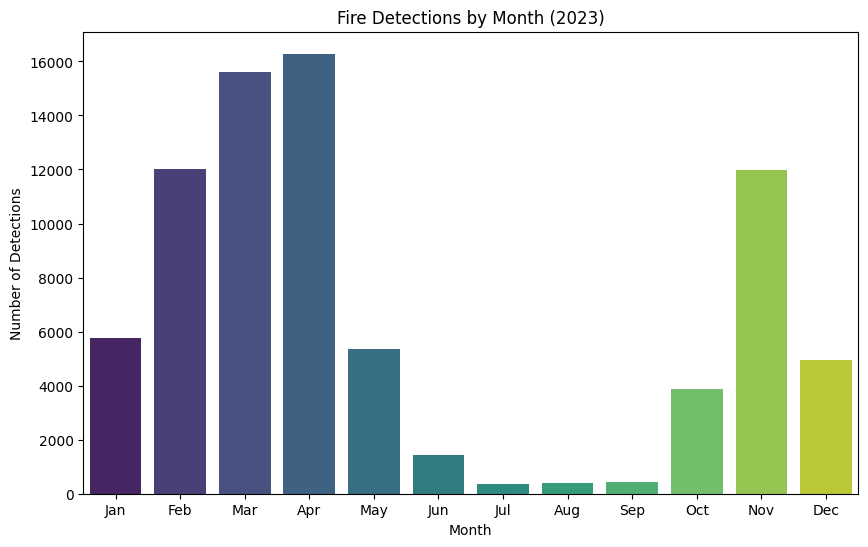

In [33]:
# Visualize fire detections over months
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month', palette='viridis')
plt.title('Fire Detections by Month (2023)')
plt.xlabel('Month')
plt.ylabel('Number of Detections')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

C:\Users\91920\AppData\Local\Temp\ipykernel_4460\714612371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_week', palette='viridis')


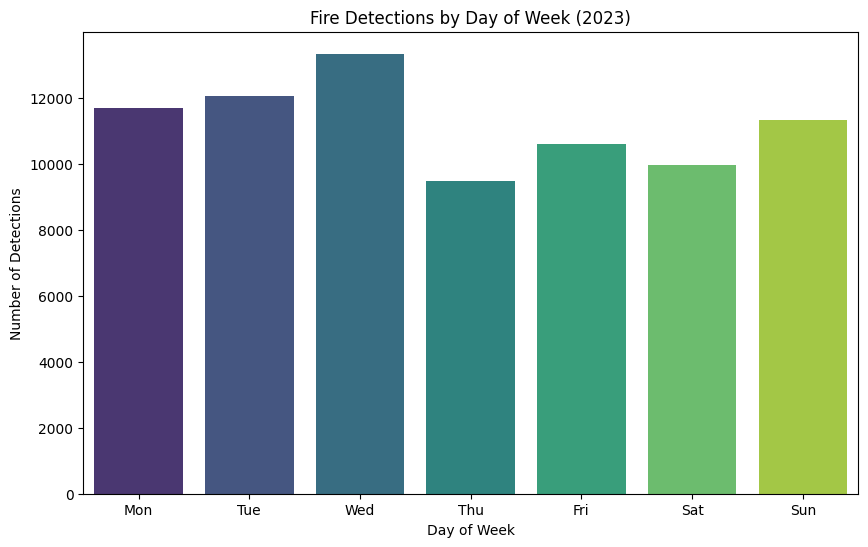

In [34]:
# Visualize fire detections by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', palette='viridis')
plt.title('Fire Detections by Day of Week (2023)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Detections')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

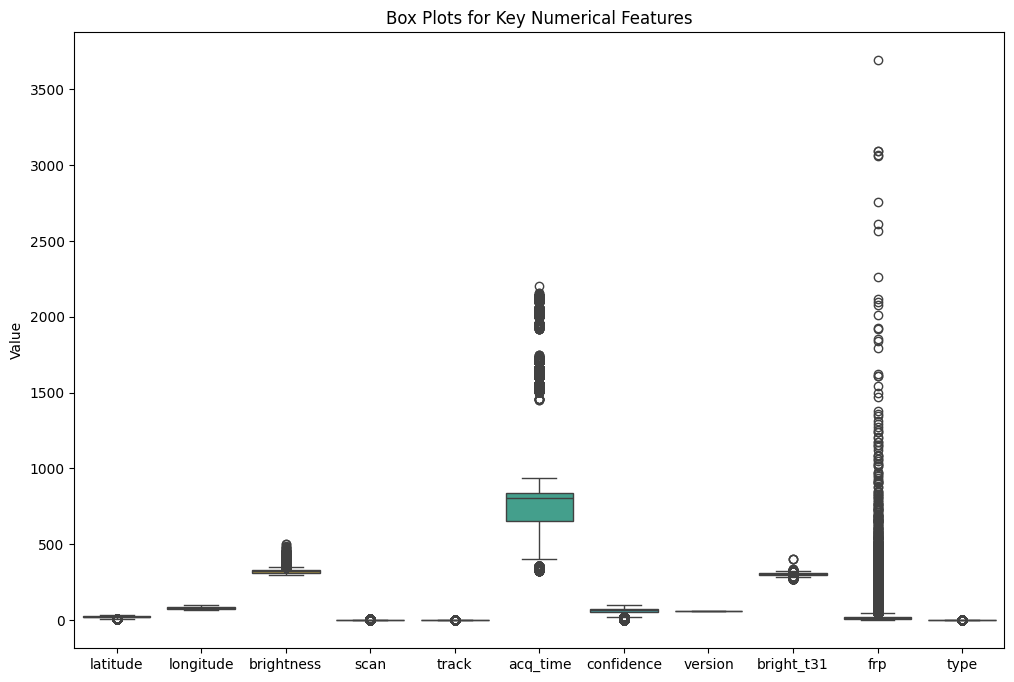

In [35]:
# Visualize outliers using box plots for key numerical features
plt.figure(figsize=(12, 8))
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

sns.boxplot(data=df[numerical_cols])
plt.title('Box Plots for Key Numerical Features')
plt.ylabel('Value')
plt.show()

In [36]:
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
  return df_cleaned

# Apply outlier removal to numerical columns
for col in numerical_cols:
  df = remove_outliers_iqr(df, col)

print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (51853, 20)


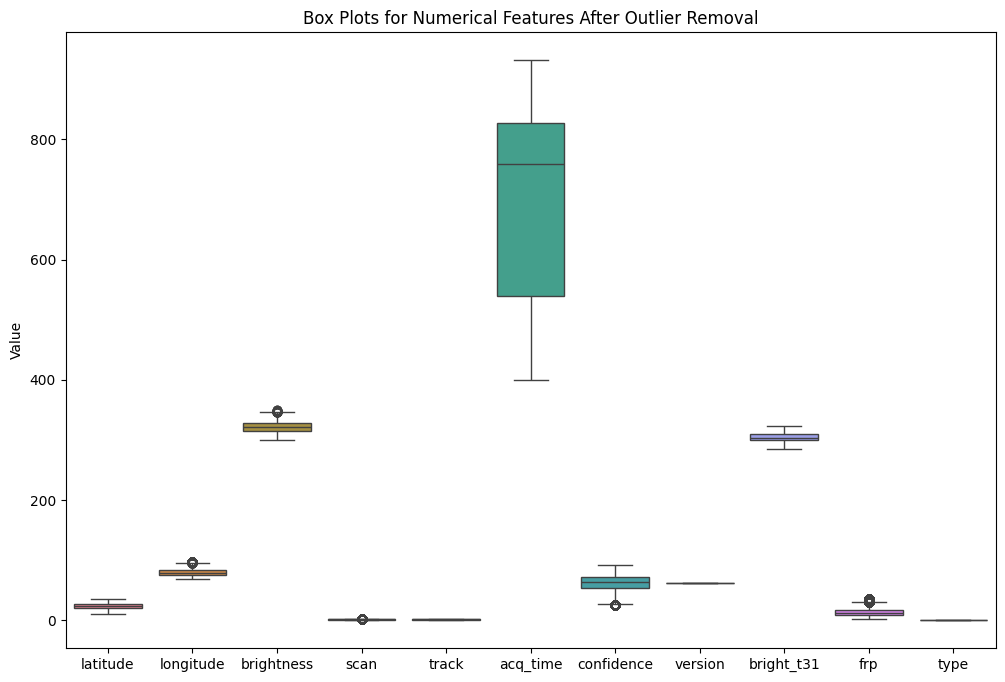

In [37]:
# Visualize box plots after outlier removal
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plots for Numerical Features After Outlier Removal')
plt.ylabel('Value')
plt.show()

In [38]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,year,month,day_of_week,day_of_year,hour
1,10.4797,77.9378,313.8,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,299.4,4.3,D,0,2023,1,6,1,82
2,13.2478,77.2639,314.7,1.0,1.0,2023-01-01,822,Aqua,MODIS,55,61.03,302.4,4.9,D,0,2023,1,6,1,82
3,12.2994,78.4085,314.3,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,301.9,4.8,D,0,2023,1,6,1,82
5,14.1707,75.4922,322.2,1.2,1.1,2023-01-01,823,Aqua,MODIS,66,61.03,301.7,16.0,D,0,2023,1,6,1,82
7,14.9327,75.1098,317.1,1.2,1.1,2023-01-01,823,Aqua,MODIS,38,61.03,302.4,9.6,D,0,2023,1,6,1,82


In [39]:
df.type.value_counts()

type
0    51853
Name: count, dtype: int64

In [40]:
categorical_cols = df.select_dtypes(include='object').columns

In [41]:
categorical_cols

Index(['satellite', 'instrument', 'daynight'], dtype='object')

In [42]:
# Select categorical columns for encoding
categorical_cols_to_encode = ['daynight', 'satellite', 'instrument']

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=False)

In [43]:
df_encoded.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,version,bright_t31,...,type,year,month,day_of_week,day_of_year,hour,daynight_D,satellite_Aqua,satellite_Terra,instrument_MODIS
1,10.4797,77.9378,313.8,1.0,1.0,2023-01-01,822,58,61.03,299.4,...,0,2023,1,6,1,82,True,True,False,True
2,13.2478,77.2639,314.7,1.0,1.0,2023-01-01,822,55,61.03,302.4,...,0,2023,1,6,1,82,True,True,False,True
3,12.2994,78.4085,314.3,1.0,1.0,2023-01-01,822,58,61.03,301.9,...,0,2023,1,6,1,82,True,True,False,True
5,14.1707,75.4922,322.2,1.2,1.1,2023-01-01,823,66,61.03,301.7,...,0,2023,1,6,1,82,True,True,False,True
7,14.9327,75.1098,317.1,1.2,1.1,2023-01-01,823,38,61.03,302.4,...,0,2023,1,6,1,82,True,True,False,True


In [44]:
df_encoded.type.value_counts()

type
0    51853
Name: count, dtype: int64

In [ ]:
# !pip install folium
import folium

# Create map and sample data
india_map = folium.Map(location=[22.351115, 78.667743], zoom_start=5)
sample_df = df_encoded.sample(n=min(10000, len(df_encoded)), random_state=42)

# Add markers
for _, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=f"FRP: {row['frp']:.2f}, Date: {row['acq_date'].strftime('%Y-%m-%d')}"
    ).add_to(india_map)

display(india_map)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols_to_scale = ['brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']
df_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_encoded[numerical_cols_to_scale])
df_encoded.head()


,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,version,bright_t31,...,type,year,month,day_of_week,day_of_year,hour,daynight_D,satellite_Aqua,satellite_Terra,instrument_MODIS
1,10.4797,77.9378,-0.976327,-0.828947,-0.833425,2023-01-01,822,-0.311369,61.03,-0.753179,...,0,2023,1,6,1,82,True,True,False,True
2,13.2478,77.2639,-0.866517,-0.828947,-0.833425,2023-01-01,822,-0.538343,61.03,-0.296235,...,0,2023,1,6,1,82,True,True,False,True
3,12.2994,78.4085,-0.915322,-0.828947,-0.833425,2023-01-01,822,-0.311369,61.03,-0.372392,...,0,2023,1,6,1,82,True,True,False,True
5,14.1707,75.4922,0.048571,-0.123341,0.047824,2023-01-01,823,0.293895,61.03,-0.402855,...,0,2023,1,6,1,82,True,True,False,True
7,14.9327,75.1098,-0.573689,-0.123341,0.047824,2023-01-01,823,-1.824528,61.03,-0.296235,...,0,2023,1,6,1,82,True,True,False,True


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51853 entries, 1 to 78415
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   latitude          51853 non-null  float64       
 1   longitude         51853 non-null  float64       
 2   brightness        51853 non-null  float64       
 3   scan              51853 non-null  float64       
 4   track             51853 non-null  float64       
 5   acq_date          51853 non-null  datetime64[ns]
 6   acq_time          51853 non-null  int64         
 7   confidence        51853 non-null  float64       
 8   version           51853 non-null  float64       
 9   bright_t31        51853 non-null  float64       
 10  frp               51853 non-null  float64       
 11  type              51853 non-null  int64         
 12  year              51853 non-null  int32         
 13  month             51853 non-null  int32         
 14  day_of_week       51853 non

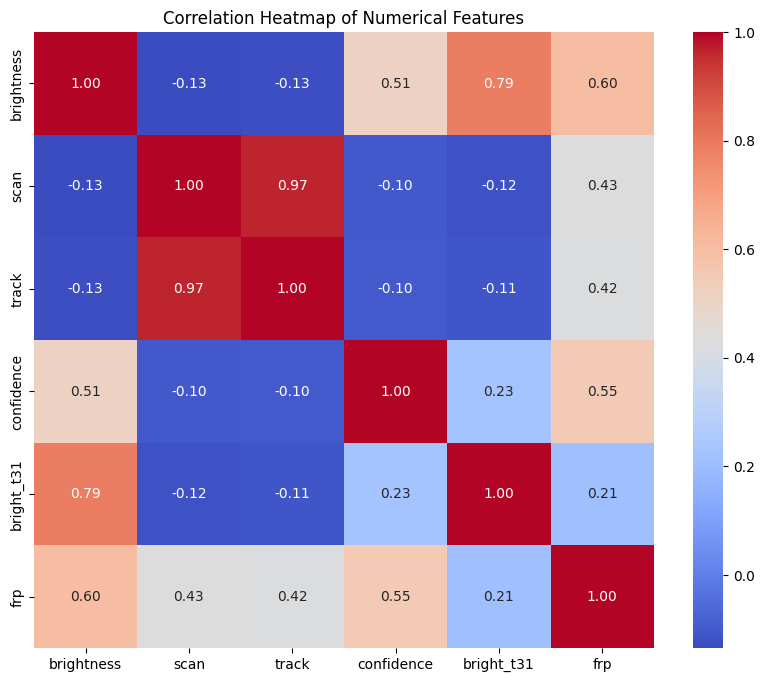

In [ ]:
# Heatmap of correlations between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded[['brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
df_encoded.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,version,bright_t31,...,type,year,month,day_of_week,day_of_year,hour,daynight_D,satellite_Aqua,satellite_Terra,instrument_MODIS
1,10.4797,77.9378,-0.976327,-0.828947,-0.833425,2023-01-01,822,-0.311369,61.03,-0.753179,...,0,2023,1,6,1,82,True,True,False,True
2,13.2478,77.2639,-0.866517,-0.828947,-0.833425,2023-01-01,822,-0.538343,61.03,-0.296235,...,0,2023,1,6,1,82,True,True,False,True
3,12.2994,78.4085,-0.915322,-0.828947,-0.833425,2023-01-01,822,-0.311369,61.03,-0.372392,...,0,2023,1,6,1,82,True,True,False,True
5,14.1707,75.4922,0.048571,-0.123341,0.047824,2023-01-01,823,0.293895,61.03,-0.402855,...,0,2023,1,6,1,82,True,True,False,True
7,14.9327,75.1098,-0.573689,-0.123341,0.047824,2023-01-01,823,-1.824528,61.03,-0.296235,...,0,2023,1,6,1,82,True,True,False,True


In [ ]:
df_encoded.type.value_counts()

type
0    51853
Name: count, dtype: int64

In [ ]:
# Separate features (X) and target variable (y)
# Assuming 'type' is the target variable you want to predict
# Drop temporal features if not intended for prediction task that uses 'type' as target
features = ['brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']
target = 'type'

X = df_encoded[features]
y = df_encoded[target]


In [ ]:
X

,brightness,scan,track,confidence,bright_t31,frp
1,-0.976327,-0.828947,-0.833425,-0.311369,-0.753179,-1.307099
2,-0.866517,-0.828947,-0.833425,-0.538343,-0.296235,-1.220935
3,-0.915322,-0.828947,-0.833425,-0.311369,-0.372392,-1.235296
5,0.048571,-0.123341,0.047824,0.293895,-0.402855,0.373086
7,-0.573689,-0.123341,0.047824,-1.824528,-0.296235,-0.545989
...,...,...,...,...,...,...
78407,-0.280861,1.640674,1.810322,-0.614001,0.556728,0.473610
78408,-0.732304,3.404689,2.691571,-1.370581,0.054089,0.344365
78409,-0.671298,1.993477,1.810322,-1.143607,-0.189615,0.028433
78412,0.048571,1.993477,1.810322,0.747843,0.252098,1.952748


In [ ]:
y

1        0
2        0
3        0
5        0
7        0
        ..
78407    0
78408    0
78409    0
78412    0
78415    0
Name: type, Length: 51853, dtype: int64

In [ ]:
import sys
!{sys.executable} -m pip install --force-reinstall scikit-learn==1.3.2




  Using cached scipy-1.16.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   --------- ------------------------------ 2.1/9.1 MB 11.8 MB/s eta 0:00:01
   ------------------ --------------------- 4.2/9.1 MB 10.1 MB/s eta 0:00:01
   --------------------- ------------------ 5.0/9.1 MB 10.4 MB/s eta 0:00:01
   --------------------------- ------------ 6.3/9.1 MB 7.6 MB/s eta 0:00:01
   ---------------------------------- ----- 7.9/9.1 MB 7.6 MB/s eta 0:00:01
   ------------------------------------ --- 8.4/9.1 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------  8.9/9.1 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 9.1/9.1 MB 5.9 MB/s eta 0:00:00
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
   ---------------------------------------- 0.0/15.5 MB ? eta -:-

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
# Step 1: Import necessary libraries
# Step 1: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Step 2: Load your dataset (replace with your path or DataFrame)
df = pd.read_csv(r"C:\Users\91920\OneDrive\Desktop\aicte internship\modis_2021_India.csv")
df = pd.read_csv(r"C:\Users\91920\OneDrive\Desktop\aicte internship\modis_2022_India.csv")
df = pd.read_csv(r"C:\Users\91920\OneDrive\Desktop\aicte internship\modis_2023_India.csv") # replace with actual file or use df if already loaded

# Step 3: Encode categorical columns
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object', 'category']):
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Step 4: Define feature and target columns
target_column = 'target'  # 🔁 Replace with your actual target column name
X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]

# Step 5: Scale numerical columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 7: Check class balance after resampling
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


KeyError: "['target'] not found in axis"

In [ ]:
# Split the dataset into training and testing sets
# You can adjust the test_size and random_state as needed
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (411392, 6)
Shape of X_test: (137131, 6)
Shape of y_train: (411392,)
Shape of y_test: (137131,)


In [ ]:
# Import Logistic Regression to Train from SKlearn
loreg = LogisticRegression(max_iter=200)
loreg.fit(X_train,y_train)
loreg_pred = loreg.predict(X_test)
score = accuracy_score(y_test,loreg_pred)
cr = classification_report(y_test,loreg_pred)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Logistic Regression
Accuracy Score value: 0.5858
              precision    recall  f1-score   support

           0       0.62      0.51      0.56     45710
           2       0.48      0.48      0.48     45710
           3       0.65      0.76      0.70     45711

    accuracy                           0.59    137131
   macro avg       0.58      0.59      0.58    137131
weighted avg       0.58      0.59      0.58    137131



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
score = accuracy_score(y_test,dtc_pred)
cr = classification_report(y_test,dtc_pred)

print("Decision Tree")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Decision Tree
Accuracy Score value: 0.9497
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     45710
           2       0.92      0.93      0.93     45710
           3       1.00      1.00      1.00     45711

    accuracy                           0.95    137131
   macro avg       0.95      0.95      0.95    137131
weighted avg       0.95      0.95      0.95    137131



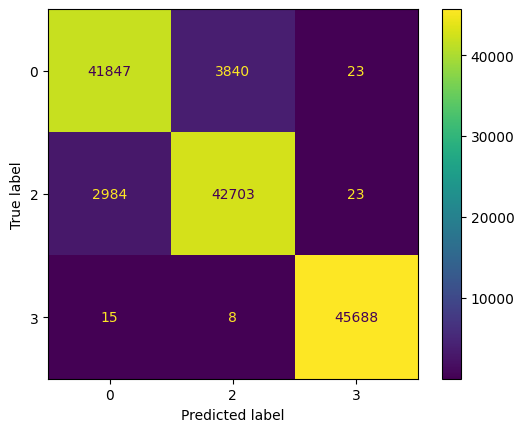

In [ ]:
dt_cm = ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
score = accuracy_score(y_test,rfc_pred)
cr = classification_report(y_test,rfc_pred)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Random Forest
Accuracy Score value: 0.9778
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     45710
           2       0.96      0.97      0.97     45710
           3       1.00      1.00      1.00     45711

    accuracy                           0.98    137131
   macro avg       0.98      0.98      0.98    137131
weighted avg       0.98      0.98      0.98    137131



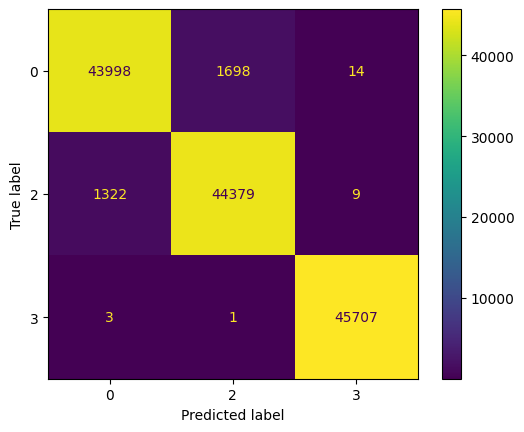

In [ ]:
rf_cm = ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)

In [ ]:
# KNeighborsClassifier to Train from SKlearn
knnc = KNeighborsClassifier()
knnc.fit(X_train,y_train)
knn_pred = knnc.predict(X_test)
score = accuracy_score(y_test,knn_pred)
cr = classification_report(y_test,knn_pred)

print("KNeighbors Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

KNeighbors Classifier
Accuracy Score value: 0.9311
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     45710
           2       0.84      0.98      0.91     45710
           3       1.00      1.00      1.00     45711

    accuracy                           0.93    137131
   macro avg       0.94      0.93      0.93    137131
weighted avg       0.94      0.93      0.93    137131



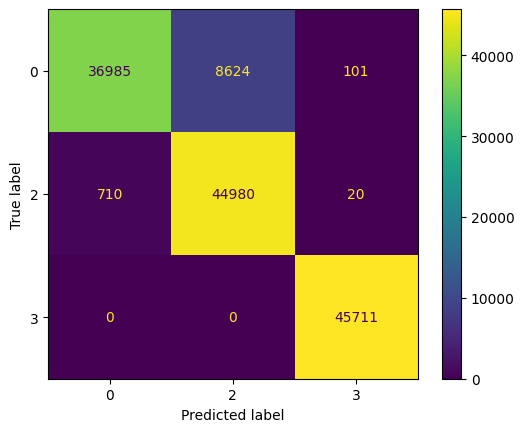

In [ ]:
knn_cm = ConfusionMatrixDisplay.from_estimator(knnc, X_test, y_test)

In [ ]:
# Collect the accuracies of each model
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, loreg_pred),
    "Decision Tree": accuracy_score(y_test, dtc_pred),
    "Random Forest": accuracy_score(y_test, rfc_pred),
    "KNeighbors Classifier": accuracy_score(y_test, knn_pred)
}

# Find the best model
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]

print("Model Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")

print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")

Model Accuracies:
Logistic Regression: 0.5858
Decision Tree: 0.9497
Random Forest: 0.9778
KNeighbors Classifier: 0.9311

Best Model: Random Forest with Accuracy: 0.9778


In [ ]:
import joblib

# Save the best model
# Based on the previous output, let's assume Random Forest was the best model.
best_model = rfc

joblib.dump(best_model, 'best_fire_detection_model.pkl')

# Save the StandardScaler instance
joblib.dump(scaler, 'scaler.pkl')

print("Best model and scaler saved successfully.")

Best model and scaler saved successfully.
